# Aprendizaje Supervisado 1: Sprit 2
*Autor: Adrián Robles Arques*


## ENUNCIADO
A partir del conjunto de datos ASI_casoPractico.csv responda a las siguientes preguntas:

* Enumere las 3 variables explicativas que presentan mayor correlación con el
target.
* Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.
* A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.
* Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.

***Objetivo de la actividad***: Aprender a ajustar el algoritmo de Naive Bayes y validar su precisión a partir de la curva ROC y el área bajo la curva.


## Parte 1
Empezamos importando las bibliotecas pertinentes y repitiendo el proceso de carga de datos tal como hicimos en el sprint 1, aunque con la mejora de crear una variable para almacenar el nombre con el que se sube el archivo, porque en ocasiones, cuando se ejecuta más de una vez, Google Colab actualiza automáticamente el nombre y esto puede hacer que falle la ejecución por si sola.

In [2]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

#LIBRERIAS PARA CARGAR DATOS EN COLAB
from google.colab import files
import io

In [3]:
# 2 - CARGA DEL FICHERO DE DATOS
#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()

Saving ASI_casoPractico.csv to ASI_casoPractico.csv


In [4]:
#Leemos el nombre del archivo, por si se carga varias veces.
names = []
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  names.append(fn)

User uploaded file "ASI_casoPractico.csv" with length 167523 bytes


In [5]:
#Leemos los datos y tenemos en cuenta que el separador es ';'
data = pd.read_csv(names[0], sep=';')
data = data.drop(["ID","b","e","DR"], axis = 1) #Eliminamos columnas innecesarias
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


## Ejercicio 1: Calculamos la matriz de correlaciones y evaluamos las 3 más correladas con la variable Target.

In [ ]:
#Calculamos la matriz de correlaciones, tomamos la variable 'Target' y ordenamos
data.corr()['Target'].abs().sort_values(ascending=False)

,Target
Target,1.000000
ASTV,0.493391
ALTV,0.489400
AC,0.369470
DP,0.340647
LBE,0.251875
UC,0.213611
MSTV,0.207717
MLTV,0.172519
Min,0.158171


De modo que las tres variables con mayor correlación con Target son:


1.   ASTV
2.   ALTV
3.   AC



## Ejercicio 2: Crear un conjunto de entrenamiento y otro de test con una divisón de 60-40

In [6]:
#Importamos librerías para muestreo de datos
from sklearn.model_selection import train_test_split

#Separamos la variable objetico de las variables explicativas
X_data = data.drop('Target', axis=1)
Y_data = data['Target']

#Creamos los subconjuntos
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data,
                                         Y_data, test_size=0.4, random_state=1)



Empleamos la función `train_test_split` de la librería de sklear para realizar una división aleatoria de la muestra de datos en un conjunto de entrenamiento y otro de test, indicamos que el `test_size = 0.4`, lo que nos genera la división de 60% de los datos para el conjunto de entrenamiento y 40% para el de test.

## Ejercicio 3: A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.

In [7]:
#Creamos el modelo de Naive bayes
#La mayoría de variables son continuas, por lo que usaremos el modelo Gaussiano

from sklearn.naive_bayes import GaussianNB

In [8]:
#Definimos la función del modelo y lo entrenamos
modelGNB = GaussianNB()
modelGNB.fit(X_data_train, Y_data_train)

GaussianNB()

Con el modelo ya entrenado, vamos a realizar una predicción para el conjunto de variables de test, y evaluar la precisión del modelo.

In [9]:
#Realizamos la predicción del modelo ajustado
Y_predict_train = modelGNB.predict_proba(X_data_train)
Y_predict_test = modelGNB.predict_proba(X_data_test)

Para la validación del modelo, vamos a importar las funciones pertinentes para la construcción de la curva ROC.

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [11]:
#Generamos la curva ROC y calculamos el área bajo la curva (AUC)

#Conjunto de entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(Y_data_train, Y_predict_train[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

#Conjunto de test
fpr_test, tpr_test, thresholds_test = roc_curve(Y_data_test, Y_predict_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

Por último vamos a graficar el resultado, comparando la curva ROC de los conjuntos de entrenamiento y test para comprovar si existe sobreajuste y mostrar el área bajo la curva en ambos casos.

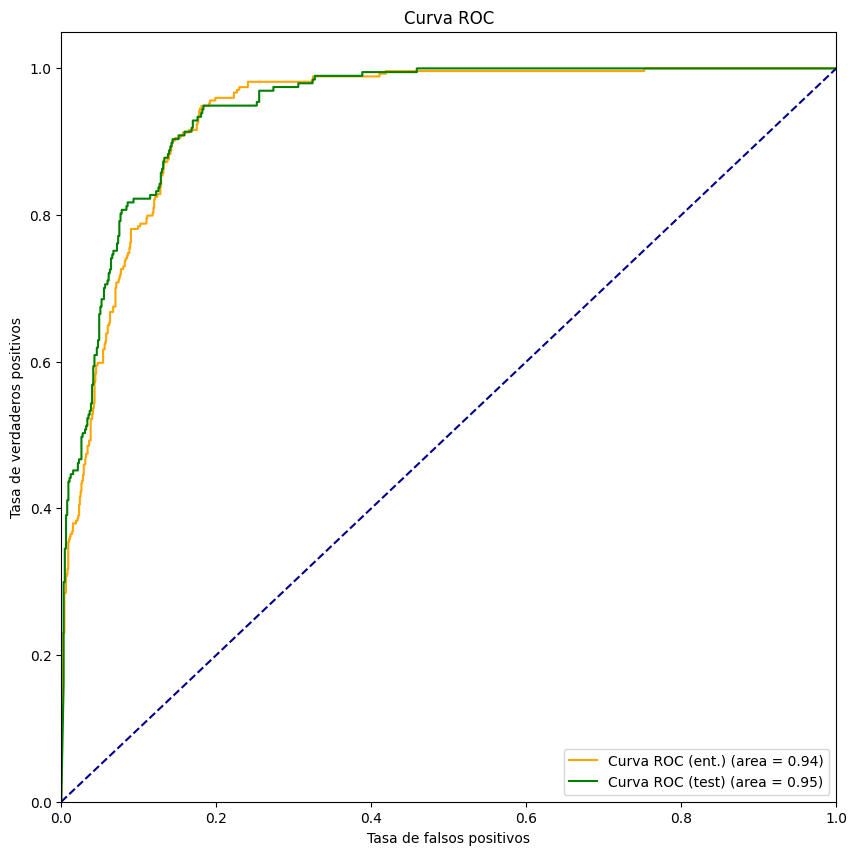

In [12]:
#Creamos la gráfica para representar los valores

plt.figure(figsize=(10,10))

plt.plot(fpr_train, tpr_train, color='orange',
         label='Curva ROC (ent.) (area = {})'.format(round(roc_auc_train,2)))
plt.plot(fpr_test, tpr_test, color='green',
         label='Curva ROC (test) (area = {})'.format(round(roc_auc_test,2)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Vemos que en este caso, con una distribución de 60% para el conjunto de entramiento y 30% del conjunto de datos para el conjunto de test, obntenemos un área bajo la curva de 0.94 en el entrenamiento y de 0.95 en el test, lo que muestra un fuerte valor predictor del modelo, y además no presenta sobreajuste para la distribución de datos dada, ya que el área para el conjunto de entrenamiento es ligeramente menor.

# Sprint 3 Aprendizaje supervisado 1


A partir del conjunto de datos ASI_casoPractico.csv responda a las siguientes preguntas:

* A partir del conjunto de entrenamiento y test creados en el segundo sprint, ajuste un modelo utilizando el algoritmo SVM dejando los valores por defecto.
* Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.
* Compare en la misma gráfica, la curva ROC y el AUC para el conjunto de test   clasificado con Naive Bayes y con SVM.

**Objetivo de la actividad**: *Aprender a ajustar el algoritmo de Support Vector Machine y validar su precisión a partir de la curva ROC y el área bajo la curva.*

## Parte 1

Vamos a entrenar, con los mismos conjuntos de entrenamiento y test del Sprint 2, el modelo SVM con los valores por defecto. Primero importaremos el generador de modelos de Support Vector Classifier desde la biblioteca de origen.




In [13]:
#Importamos el generador del modelo desce sklearn
from sklearn.svm import SVC

In [22]:
#Generamos el modelo con SVC
SVC_model = SVC(probability=True) #De esta forma calcula probabilidades
SVC_model.fit(X_data_train, Y_data_train)

SVC(probability=True)

## Parte 2

Con el modelo ya generado a partir de los datos de entrenamiento previos, vamos a realizar una predicción y evaluar el ajuste del modelo. Para que la comparación posterior con el Naive Bayes sea adecuada, debemos poder predecir la probabilidad de cada evento, que es lo que hemos representado en el caso anterior, para ello al generar el modelo debemos intriducir:

`SVC(probability = True)`

De esta forma, al generar los nuevos datos predichos y poder comparar, podemos generar la probabilidad, y no el dato crudo, tal como obtuvimos en el ejercicio anterior, con el comando:

`SVC_model.predict_proba(data)`

In [23]:
#Realizamos la predicción del modelo ajustado
#Solo podemos usar .predict_proba si hemos hecho SVC(probabiliti= True)
Y_SVC_predict_train = SVC_model.predict_proba(X_data_train)
Y_SVC_predict_test = SVC_model.predict_proba(X_data_test)

In [25]:
#Generamos la curva ROC y calculamos el área bajo la curva (AUC) para el SVC

#Conjunto de entrenamiento
fpr_SVC_train, tpr_SVC_train, thresholds_train = roc_curve(Y_data_train, Y_SVC_predict_train[:,1])
roc_SVC_auc_train = auc(fpr_SVC_train, tpr_SVC_train)

#Conjunto de test
fpr_SVC_test, tpr_SVC_test, thresholds_test = roc_curve(Y_data_test, Y_SVC_predict_test[:,1])
roc_SVC_auc_test = auc(fpr_SVC_test, tpr_SVC_test)

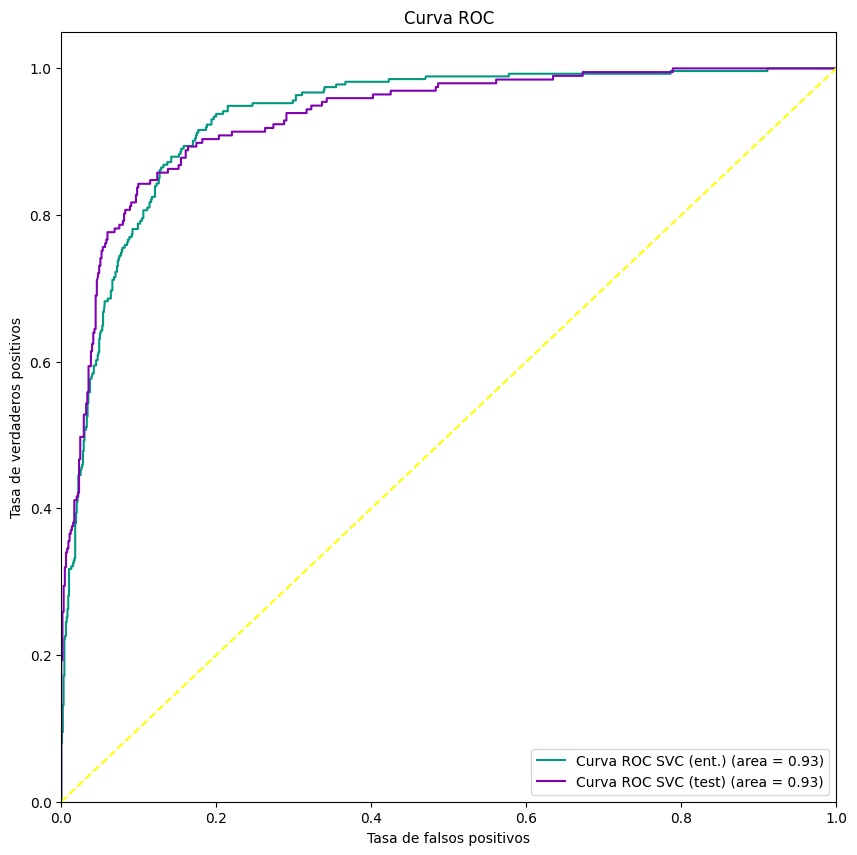

In [40]:
#Creamos la gráfica para representar los valores del SVC (probabilisticos)

plt.figure(figsize=(10,10))

plt.plot(fpr_SVC_train, tpr_SVC_train, color= (0,.6,.5),
         label='Curva ROC SVC (ent.) (area = {})'.format(round(roc_SVC_auc_train,2)))
plt.plot(fpr_SVC_test, tpr_SVC_test, color= (.5,0,.7),
         label='Curva ROC SVC (test) (area = {})'.format(round(roc_SVC_auc_test,2)))
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Evaluación

Vemos que el resultado del clasificador es bastante bueno, dado que el área bajo la curva es muy próxima a 1, además no existe sobreajuste dado que el resultado para tanto para el conjunto de entrenamiento como el de test es de 0,93.

## Parte 3

Vamos a comparar los resultados del modelado con Naive Bayes y con Support Vector Machine. Para ello grafiamos los resultados juntos.

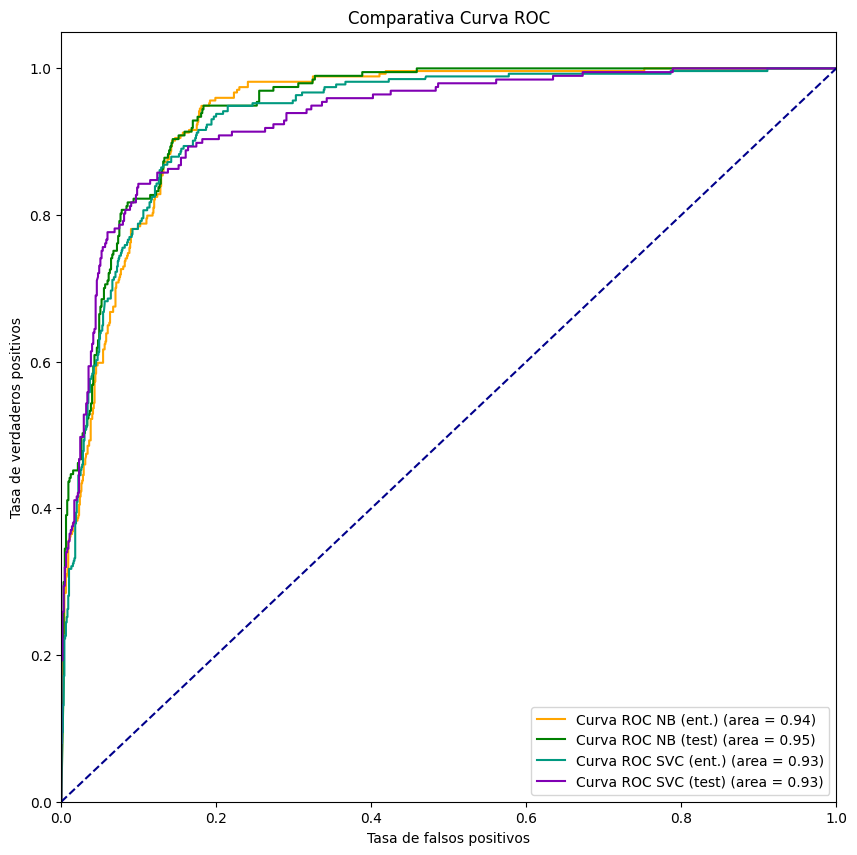

In [42]:
plt.figure(figsize=(10,10))

plt.plot(fpr_train, tpr_train, color='orange',
         label='Curva ROC NB (ent.) (area = {})'.format(round(roc_auc_train,2)))
plt.plot(fpr_test, tpr_test, color='green',
         label='Curva ROC NB (test) (area = {})'.format(round(roc_auc_test,2)))
plt.plot(fpr_SVC_train, tpr_SVC_train, color= (0,.6,.5),
         label='Curva ROC SVC (ent.) (area = {})'.format(round(roc_SVC_auc_train,2)))
plt.plot(fpr_SVC_test, tpr_SVC_test, color= (.5,0,.7),
         label='Curva ROC SVC (test) (area = {})'.format(round(roc_SVC_auc_test,2)))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Comparativa Curva ROC')
plt.legend(loc="lower right")

plt.show()

### Comparativa

Ahora que vemos ambas gráficas representadas juntas, podemos observar que el resultado del ajuste del modelo entrenado con Naive Bayes es ligeramente mejor, ya que el resultado del AUC para el test es de 0,95 en comparación al 0,93 del caso con el modelo SVC.

Ninguno de los dos presenta evidencias de sobreajuste, dado que el resultado para el conjunto de test es igual o mejor que para el conjunto de entrenamiento en ambos casos.

Dado que ambos resultados suponen un muy buen ajuste, podríamos tomar cualquiera de ellos. También podríamos emplear otra serie de pruebas para validar el ajuste del modelo y finalmente decidir cuál de los dos deberíamos escoger preferentemente frente al otro.